In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
data = pd.read_csv("/kaggle/input/road-accident-survival-dataset/accident.csv")
data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [4]:
data.isnull().sum()

Age                0
Gender             1
Speed_of_Impact    3
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64

In [5]:
data['Gender'] = data['Gender'].fillna('Male')

In [6]:
data['Speed_of_Impact'] = data['Speed_of_Impact'].fillna(data['Speed_of_Impact'].mean())

In [7]:
data['Gender'] = data['Gender'].map({"Female":0,"Male":1})

In [8]:
data[['Helmet_Used','Seatbelt_Used']] = data[['Helmet_Used','Seatbelt_Used']].replace({"Yes":1,"No":0})

<ipython-input-8-55d3ec81a5db>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[['Helmet_Used','Seatbelt_Used']] = data[['Helmet_Used','Seatbelt_Used']].replace({"Yes":1,"No":0})


In [9]:
data['Age'] = data['Age'].apply(lambda x: 0 if x>50 else 1)

In [10]:
data['Speed_of_Impact'] = data['Speed_of_Impact'].astype('int64')

In [11]:
data.loc[0:100]

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,0,0,27,0,0,1
1,0,0,46,0,1,1
2,1,1,46,1,1,0
3,1,1,117,0,1,0
4,0,0,40,1,1,0
...,...,...,...,...,...,...
96,0,0,41,1,0,0
97,0,0,77,1,0,1
98,1,1,77,1,1,1
99,1,0,105,0,0,0


In [12]:
data['Speed_of_Impact'] = data['Speed_of_Impact'].apply(lambda x: 1 if x<85 else 0).astype(int)

In [13]:
data.isnull().sum()

Age                0
Gender             0
Speed_of_Impact    0
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64

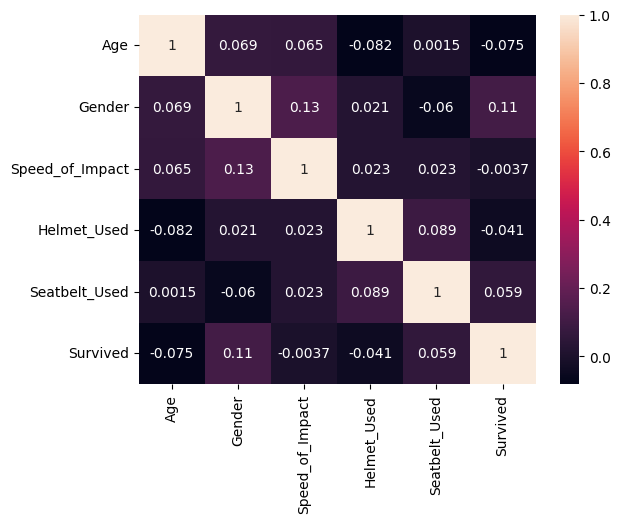

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

c = data.corr()

sns.heatmap(c,annot=True)
plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [16]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [18]:
logic = LogisticRegression()
logic.fit(X_train,y_train)

LogisticRegression()

In [19]:
y_pred = logic.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0])

In [20]:
cls = classification_report(y_test,y_pred)
print(cls)

              precision    recall  f1-score   support

           0       0.62      0.45      0.53        33
           1       0.50      0.67      0.57        27

    accuracy                           0.55        60
   macro avg       0.56      0.56      0.55        60
weighted avg       0.57      0.55      0.55        60



In [21]:
dec = DecisionTreeClassifier(criterion='gini',max_depth=4)
dec.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [22]:
yy_pred = dec.predict(X_test)
yy_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [23]:
cls1 = classification_report(y_test,yy_pred)
print(cls1)

              precision    recall  f1-score   support

           0       0.58      0.67      0.62        33
           1       0.50      0.41      0.45        27

    accuracy                           0.55        60
   macro avg       0.54      0.54      0.53        60
weighted avg       0.54      0.55      0.54        60



In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
m  = KNeighborsClassifier(n_neighbors=5)
m.fit(X_train,y_train)

KNeighborsClassifier()

In [26]:
cls2 = classification_report(y_test,m.predict(X_test))
print(cls2)

              precision    recall  f1-score   support

           0       0.56      0.45      0.50        33
           1       0.45      0.56      0.50        27

    accuracy                           0.50        60
   macro avg       0.51      0.51      0.50        60
weighted avg       0.51      0.50      0.50        60

